In [ ]:
%matplotlib inline


# Feature importances with forests of trees


This examples shows the use of forests of trees to evaluate the importance of
features on an artificial classification task. The red bars are the feature
importances of the forest, along with their inter-trees variability.

As expected, the plot suggests that 3 features are informative, while the
remaining are not.



In [108]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
N = 4
X, y = make_classification(n_samples=250,
                           n_features=10,
                           n_informative=N,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=3,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest


Automatically created module for IPython interactive environment
Feature ranking:
1. feature 3 (0.195633)
2. feature 1 (0.192121)
3. feature 0 (0.122627)
4. feature 2 (0.097152)
5. feature 4 (0.072038)
6. feature 6 (0.067311)
7. feature 8 (0.065111)
8. feature 5 (0.062904)
9. feature 9 (0.062869)
10. feature 7 (0.062233)


In [109]:
importances

array([0.12262747, 0.1921211 , 0.09715235, 0.19563265, 0.07203792,
       0.06290403, 0.0673112 , 0.06223309, 0.06511143, 0.06286876])

In [110]:
sum(importances[0:N])

0.6075335757507055

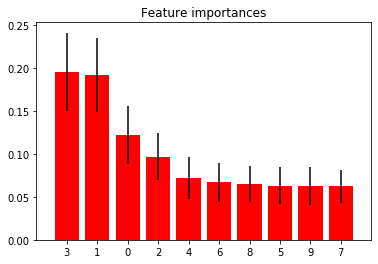

In [111]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [112]:
forest

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [178]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
X, y = iris.data, iris.target
X.shape
X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape


(150, 1)

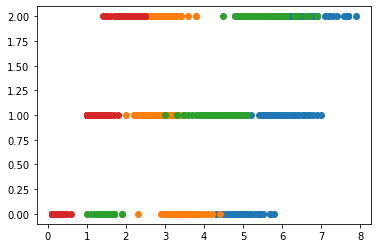

In [148]:
plt.plot(X.T[0],y,'o')
plt.plot(X.T[1],y,'o')
plt.plot(X.T[2],y,'o')
plt.plot(X.T[3],y,'o')

In [149]:
X_new[0],X[0]

(array([1.4]), array([5.1, 3.5, 1.4, 0.2]))

In [150]:
from sklearn.feature_selection import f_regression, mutual_info_regression

In [151]:
f_test= f_regression(X, y)
#f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

In [155]:
f_test,mi

((array([ 233.8389959 ,   32.93720748, 1341.93578461, 1592.82421036]),
  array([2.89047835e-32, 5.20156326e-08, 4.20187315e-76, 4.15531102e-81])),
 array([0.48355396, 0.27173072, 0.99993133, 0.99725028]))

In [144]:
f_test

(array([187.42118421,  52.52357392,   0.47268298]),
 array([3.19286906e-39, 8.50243215e-13, 4.91915197e-01]))

In [270]:
Xx =np.array([[1,2,0,0],[2,0,0,0],[3,0,0,1],[0,2,1,0]])
yy = np.array([1,2,3,4])

In [271]:
f_test= f_regression(Xx, yy)
f_test

(array([0.08333333, 0.        , 3.        , 0.14285714]),
 array([0.8       , 1.        , 0.22540333, 0.74180111]))

In [252]:
X_new = SelectKBest(chi2, k=2).fit_transform(Xx, yy)
X_new

array([[0., 0.],
       [0., 0.],
       [3., 1.],
       [2., 0.]])

In [253]:
mi = mutual_info_regression(Xx, yy)
mi

array([0, 0, 0, 0])

In [254]:
Xx

array([[1. , 0. , 0. , 0. ],
       [2. , 0. , 0. , 0. ],
       [3. , 0. , 3. , 1. ],
       [3.9, 1. , 2. , 0. ]])

In [255]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [186]:
y,yy

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([1, 2, 3, 4]))

Automatically created module for IPython interactive environment
Training MLPRegressor...
Computing partial dependence plots...
Training GradientBoostingRegressor...
Computing partial dependence plots...
Custom 3d plot via ``partial_dependence``


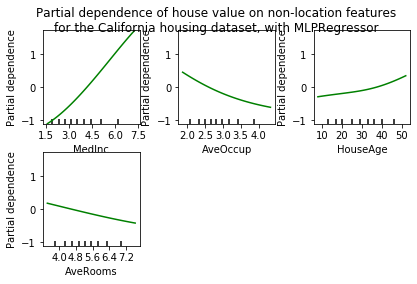

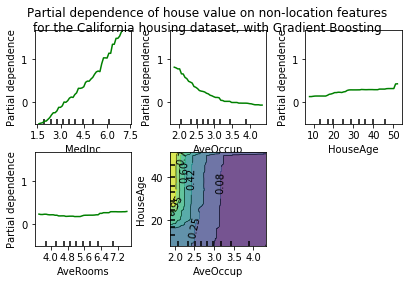

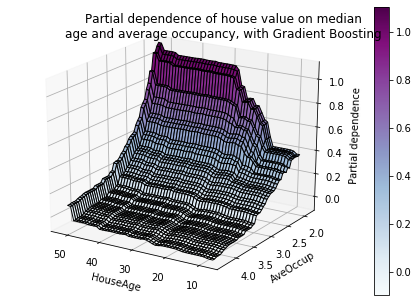

In [272]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets.california_housing import fetch_california_housing


def main():
    cal_housing = fetch_california_housing()

    X, y = cal_housing.data, cal_housing.target
    names = cal_housing.feature_names

    # Center target to avoid gradient boosting init bias: gradient boosting
    # with the 'recursion' method does not account for the initial estimator
    # (here the average target, by default)
    y -= y.mean()

    print("Training MLPRegressor...")
    est = MLPRegressor(activation='logistic')
    est.fit(X, y)
    print('Computing partial dependence plots...')
    # We don't compute the 2-way PDP (5, 1) here, because it is a lot slower
    # with the brute method.
    features = [0, 5, 1, 2]
    plot_partial_dependence(est, X, features, feature_names=names,
                            n_jobs=3, grid_resolution=50)
    fig = plt.gcf()
    fig.suptitle('Partial dependence of house value on non-location features\n'
                 'for the California housing dataset, with MLPRegressor')
    plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

    print("Training GradientBoostingRegressor...")
    est = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                    learning_rate=0.1, loss='huber',
                                    random_state=1)
    est.fit(X, y)
    print('Computing partial dependence plots...')
    features = [0, 5, 1, 2, (5, 1)]
    plot_partial_dependence(est, X, features, feature_names=names,
                            n_jobs=3, grid_resolution=50)
    fig = plt.gcf()
    fig.suptitle('Partial dependence of house value on non-location features\n'
                 'for the California housing dataset, with Gradient Boosting')
    plt.subplots_adjust(top=0.9)

    print('Custom 3d plot via ``partial_dependence``')
    fig = plt.figure()

    target_feature = (1, 5)
    pdp, axes = partial_dependence(est, X, target_feature,
                                   grid_resolution=50)
    XX, YY = np.meshgrid(axes[0], axes[1])
    Z = pdp[0].T
    ax = Axes3D(fig)
    surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                           cmap=plt.cm.BuPu, edgecolor='k')
    ax.set_xlabel(names[target_feature[0]])
    ax.set_ylabel(names[target_feature[1]])
    ax.set_zlabel('Partial dependence')
    #  pretty init view
    ax.view_init(elev=22, azim=122)
    plt.colorbar(surf)
    plt.suptitle('Partial dependence of house value on median\n'
                 'age and average occupancy, with Gradient Boosting')
    plt.subplots_adjust(top=0.9)

    plt.show()


# Needed on Windows because plot_partial_dependence uses multiprocessing
if __name__ == '__main__':
    main()